### This is the jupyter notebook for sentiment analysis of the tweets using the Twitter API
### FYP project
### Author: Muhammad Abu Bakar
### Author: Muhammad Faiz Hassan


In [6]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler


In [7]:
# 2. Import keys.py
# use keys here 



auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)


In [8]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)



Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


## We will use api as api.search inside this tweepy cursor.


In [9]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc




def get_tweets(Topic,Count):    
    i=0
    
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=500, lang="en",tweet_mode='extended',result_type='recent').items():
        print(i, end='\r')
        date=tweet.created_at
        df.loc[i,"Date"] = date.strftime("%Y-%m-%d")
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.full_text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

# take input from user
Topic = "Pakistan"
# Topic=["Pakistan"]
get_tweets(Topic , Count=500)

In [10]:
# Showing the data the Data
df.head(10)         

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-12-25,Jawad Ahmed,False,RT @SHaiderRMehdi: Anyone who thinks these guy...,0,450,"England, United Kingdom"
1,2022-12-25,humanity,False,RT @Jhagra: A friend from abroad asked why Aza...,0,1016,
2,2022-12-25,Capt. Durgesh Pratap Singh विशेष,False,RT @bharatjodo: PM Modi has pushed India into ...,0,516,"Shrawasti, India"
3,2022-12-25,Tamoor Hussain,True,Absolutely ignorant having Pakistan that low. ...,0,0,"San Francisco, CA"
4,2022-12-25,Syma Murtaza,False,"@ZunairaAzhar10 Sad and heartbreaking, I feel ...",0,0,
5,2022-12-25,Erumkhan,False,RT @Safa8311: They are trying to eliminate a L...,0,77,
6,2022-12-25,آصف چوہدری,False,RT @DrHussainQadri: Quaid-e-Azam Muhammad Ali ...,0,88,
7,2022-12-25,Bashir khan,False,RT @SYABukhari: Does this explain the state of...,0,3,"Karachi, Pakistan"
8,2022-12-25,Usman,False,RT @Jhagra: A friend from abroad asked why Aza...,0,1016,
9,2022-12-25,JhnReed,False,#Bangladesh turning into another #Pakistan and...,0,0,


In [11]:
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()



def clean_tweet(tweet):
    # tokenization
    tweet = word_tokenize(tweet)
    # lower case
    tweet = [word.lower() for word in tweet]
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    tweet = [word for word in tweet if word.isalpha()]
    tweet = " ".join(tweet)
    tweet = tweet.strip()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # remove http links
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    # remove https and username and special characters
    tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    tweet = PorterStemmer().stem(tweet)
    tweet = tweet.strip('https')
    tweet =tweet.split()
    tweet = [t for t in tweet if len(t) > 2]
    tweet = " ".join(tweet)
    
    
    return tweet



[nltk_data] Downloading package omw-1.4 to /home/bakar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:


from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'



In [13]:

from wordcloud import WordCloud, STOPWORDS


def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    # don't want to prnt these words in WordCloud
    return text_new


prepCloud("Pakistan",Topic)



'Pakistan'

In [14]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))


df.head(5)


,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-12-25,Jawad Ahmed,False,RT @SHaiderRMehdi: Anyone who thinks these guy...,0,450,"England, United Kingdom",shaiderrmehdi anyone think guy govern pakistan...
1,2022-12-25,humanity,False,RT @Jhagra: A friend from abroad asked why Aza...,0,1016,,jhagra friend abroad asked azam swati arrested...
2,2022-12-25,Capt. Durgesh Pratap Singh विशेष,False,RT @bharatjodo: PM Modi has pushed India into ...,0,516,"Shrawasti, India",bharatjodo modi pushed india highly vulnerable...
3,2022-12-25,Tamoor Hussain,True,Absolutely ignorant having Pakistan that low. ...,0,0,"San Francisco, CA",absolutely ignorant pakistan low
4,2022-12-25,Syma Murtaza,False,"@ZunairaAzhar10 Sad and heartbreaking, I feel ...",0,0,,heartbreaking feel like defender pakistan give...


In [15]:


df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(10)
# save df['sentiment'] to csv
df.to_excel('{}.xlsx'.format("Sentiment"),index=False)   ## Save as Excel



In [16]:
# use naive bayes classifier for sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy

# 
# Split into training and testing data
# load data from sentiment.xlsx
x = df['clean_tweet']
y = df['Sentiment']
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [17]:
# Vectorize text reviews to numbers
vec = CountVectorizer()
x = vec.fit_transform(x)
x_test = vec.transform(x_test)


In [18]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [19]:
model.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ",model.score(x_test, y_test)*100,"%")


Accuracy of Naive Bayes Classifier is :  72.27722772277228 %


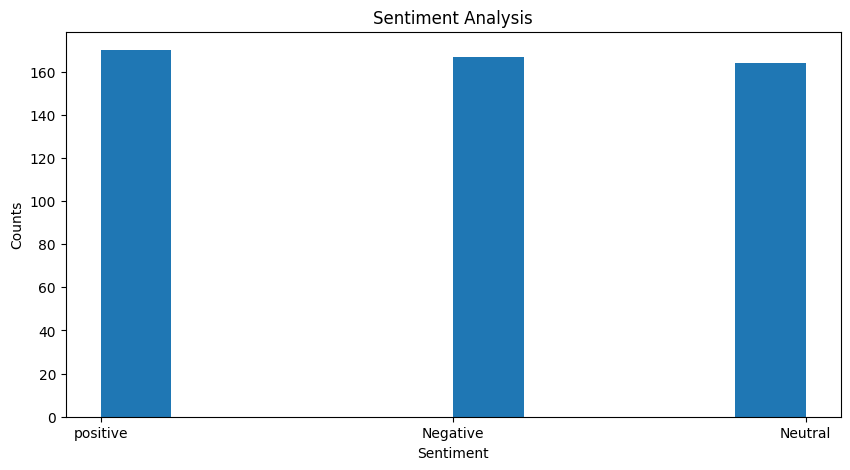

([<matplotlib.patches.Wedge at 0x7fa8ce2ded40>,
 [Text(0.5319830051518603, 0.9628053189661947, 'positive'),
  Text(-1.0992215383823003, -0.041376437213097327, 'Negative'),
  Text(0.5678223919499162, -0.9421134386050738, 'Neutral')],
 [Text(0.29017254826465105, 0.5251665376179243, '33.9%'),
  Text(-0.5995753845721637, -0.02256896575259854, '33.3%'),
  Text(0.30972130469995424, -0.5138800574209492, '32.7%')])

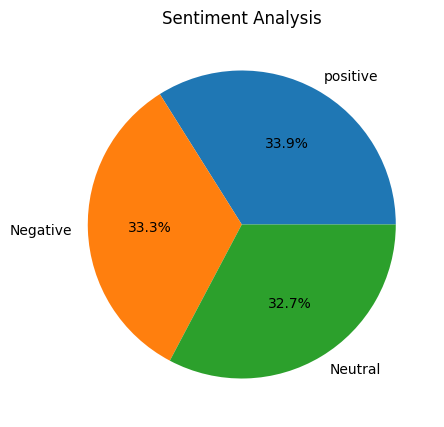

In [20]:
# print report of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.hist(df['Sentiment'])
plt.show()
# print pie chart of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].value_counts().index, autopct='%1.1f%%')

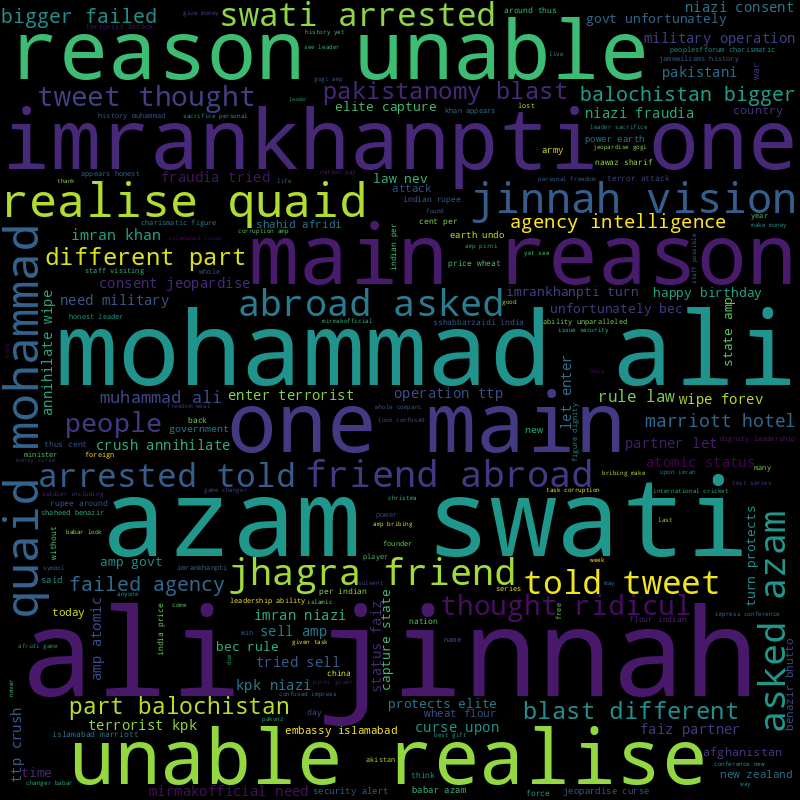

In [21]:
# plot word cloud for maximum occuring words
wordcloud = WordCloud(width = 800, height = 800)
wordcloud.generate(prepCloud(df['clean_tweet'].str.cat(sep=' '),Topic))
wordcloud.to_image()